In [1]:
# install the dependencies
!pip install kaggle 

In [2]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"45d67163b9e4110c0b8473e018a046a0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d balnyaupane/pneumonia-chest-xray-dataset-200-by-200-image -p /content

 91% 153M/168M [00:01<00:00, 132MB/s]
100% 168M/168M [00:01<00:00, 151MB/s]


In [5]:
!unzip -uq "/content/pneumonia-chest-xray-dataset-200-by-200-image.zip" -d "/content/Dataset"

In [6]:
from keras.models import Sequential
from keras.layers import Convolution2D, ZeroPadding2D ,BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout

In [7]:
classifier = Sequential()

#step1-convolution
# classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=(1,1), input_shape=(S,S,3), activation='relu', padding='same'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))

#adding First Convolution layer
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), strides=(1,1),input_shape=(200,200,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(Dropout(0.1))

#adding Second Convolution layer
classifier.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(1,1),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.4))

#adding Third Convolution layer
classifier.add(Convolution2D(filters=128, kernel_size=(3,3), strides=(2,2),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.2))

#adding Fourth Convolution layer
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), strides=(2,2),activation='relu'))
classifier.add(MaxPooling2D((2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))

#step3-flattening
classifier.add(Flatten())

#step4-full connection
classifier.add(Dense(activation='relu',units=64))
classifier.add(Dropout(0.5))

#classifier.add(Dense(activation='relu',units=32))
#classifier.add(Dropout(0.25))

classifier.add(Dense(activation='relu',units=16))

classifier.add(Dense(activation='sigmoid',units=1))

In [8]:
#compiling the cnn
classifier.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/Dataset/Pneumonia_dataset_200_by_200_image/train',
        target_size=(200, 200),
        batch_size=64,
        color_mode='grayscale',
        class_mode='binary')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory('/content/Dataset/Pneumonia_dataset_200_by_200_image/test',
        target_size=(200, 200),
        batch_size=64,
        shuffle=False,
        color_mode='grayscale',
        class_mode='binary')

print("test_set.class_indices:   ",test_set.class_indices)

# summarize model.
classifier.summary()

Found 10432 images belonging to 2 classes.
training_set.class_indices:    {'normal': 0, 'pneumonia': 1}
Found 1248 images belonging to 2 classes.
test_set.class_indices:    {'Normal': 0, 'pneumonia': 1}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 128)       0         
___________________________________________________

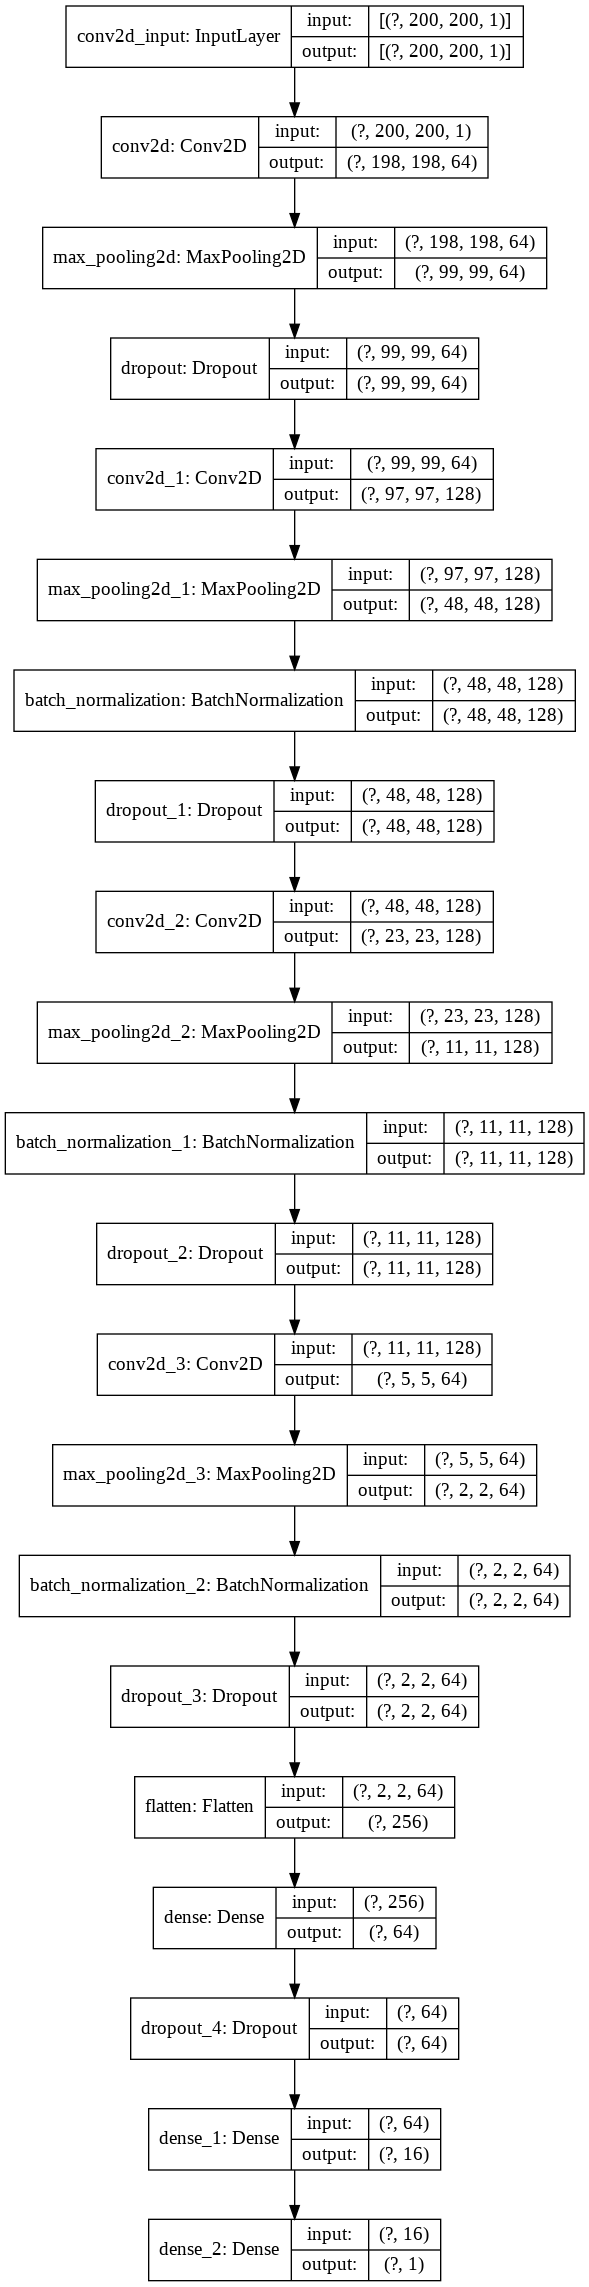

In [9]:
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='pneumonia_model.png', show_shapes=True, show_layer_names=True)

In [10]:
History=classifier.fit_generator(training_set,
        steps_per_epoch=163,
        epochs=10,
        validation_data=test_set,
        validation_steps=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
163/163 [==============================] - 55s 340ms/step - loss: 0.4370 - accuracy: 0.8027 - val_loss: 2.2573 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 55s 335ms/step - loss: 0.2836 - accuracy: 0.8787 - val_loss: 2.5579 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 55s 336ms/step - loss: 0.2253 - accuracy: 0.9066 - val_loss: 1.5138 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 55s 340ms/step - loss: 0.2085 - accuracy: 0.9220 - val_loss: 2.6021 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 55s 338ms/step - loss: 0.1923 - accuracy: 0.9249 - val_loss: 1.6165 - val_accuracy: 0.6554
Epoch 6/10
163/163 [==============================] - 54s 333ms/step - loss: 0.1806 - accuracy: 0.9298 - val_loss: 3.1827 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 

In [11]:
# list all data in history
print(History.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


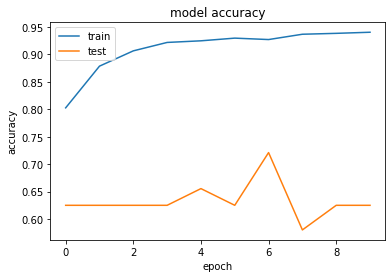

In [12]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

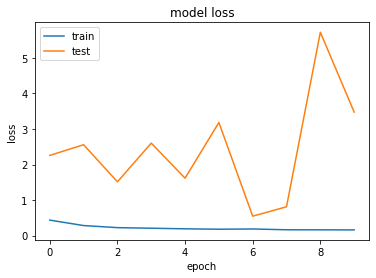

In [13]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Import dependencies
import json
from keras.models import model_from_json, load_model

# Save Weights + Architecture
classifier.save_weights('pneumoniaUsingCNN_weights.h5')
with open('pneumoniaUsingCNN_architecture.json', 'w') as f:
    f.write(classifier.to_json())

In [15]:
# Load Weights + Architecture
with open('pneumoniaUsingCNN_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())
loaded_model.load_weights('pneumoniaUsingCNN_weights.h5')

In [16]:
#compiling the cnn
loaded_model.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['accuracy'])
loaded_model.evaluate(training_set,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=1)
loaded_model.evaluate(test_set,max_queue_size=10,workers=1,use_multiprocessing=False,verbose=1)
print(loaded_model.metrics_names)

20/20 [==============================] - 2s 85ms/step - loss: 3.4748 - accuracy: 0.6250
['loss', 'accuracy']


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Classification report 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       468
           1       0.62      1.00      0.77       780

    accuracy                           0.62      1248
   macro avg       0.31      0.50      0.38      1248
weighted avg       0.39      0.62      0.48      1248



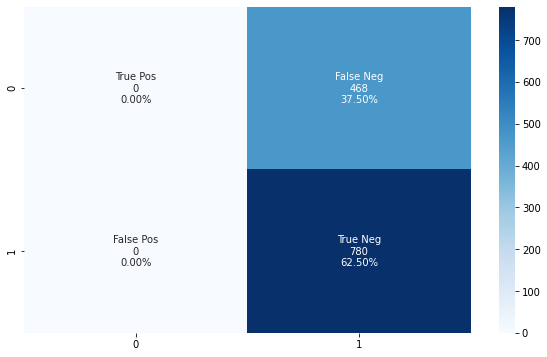

In [23]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# test_set.classes

preds = loaded_model.predict(test_set)
predictedClasses = np.where(preds>=0.5, 1, 0) 
cm = confusion_matrix(test_set.classes,predictedClasses )
#print(cm)

cnf_report=classification_report(test_set.classes, np.round(preds))
print(" Classification report ")
print(cnf_report)

group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 ========= Classification report ========
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       468
           1       0.62      1.00      0.77       780

    accuracy                           0.62      1248
   macro avg       0.31      0.50      0.38      1248
weighted avg       0.39      0.62      0.48      1248



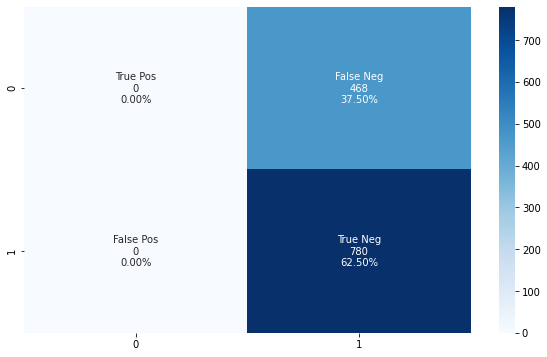

In [24]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

print(test_set.classes)

Y_pred = loaded_model.predict(test_set)
# y_pred = np.argmax(Y_pred, axis=1)
y_pred= np.where(Y_pred>0.5, 1, 0)

cnf_matrix=confusion_matrix(test_set.classes, y_pred)

cnf_report=classification_report(test_set.classes, y_pred)
print(" ========= Classification report ========")
print(cnf_report)

group_names = ["True Pos","False Neg","False Pos","True Neg"]
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In [19]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

print(test_set.classes)

Y_pred = loaded_model.predict(test_set)
# y_pred = np.argmax(Y_pred, axis=1)
y_pred= np.where(Y_pred>0.5, 1, 0)

cnf_matrix=confusion_matrix(test_set.classes, y_pred)

[0 0 0 ... 1 1 1]


<Figure size 720x432 with 0 Axes>

['normal', 'pneumonia']
Normalized confusion matrix


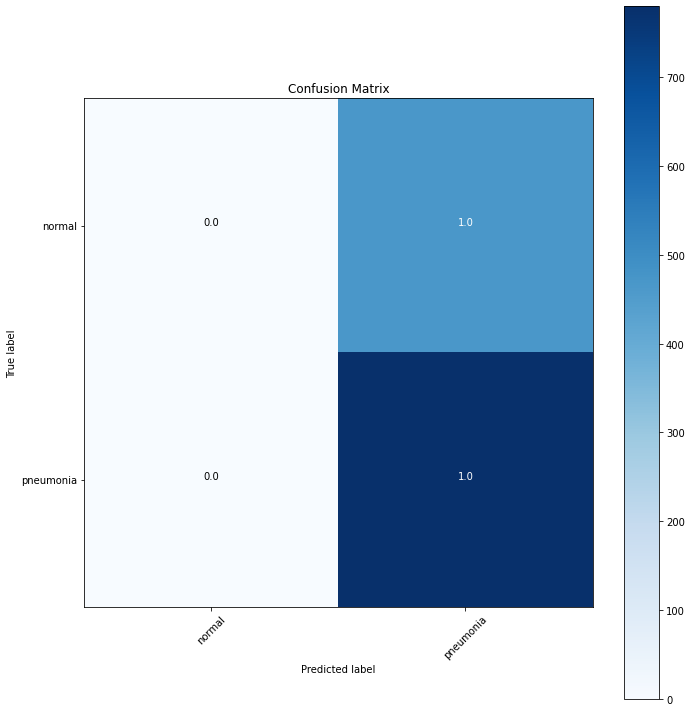

In [22]:
target_names = []
for key in training_set.class_indices:
    target_names.append(key)

print(target_names)

plot_confusion_matrix(cnf_matrix, target_names, title='Confusion Matrix')
